# Explanatory data analysis

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('./cleaned_data_set.csv')

In [79]:
df.info() #see data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     48842 non-null  int64 
 1   workclass               48842 non-null  object
 2   educational level       48842 non-null  object
 3   years of studying       48842 non-null  int64 
 4   marital status          48842 non-null  object
 5   occupation              48842 non-null  object
 6   relationship            48842 non-null  object
 7   race                    48842 non-null  object
 8   gender                  48842 non-null  object
 9   working hours per week  48842 non-null  int64 
 10  country of origin       48842 non-null  object
 11  income                  48842 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [80]:
df.isnull().sum() #no null values

age                       0
workclass                 0
educational level         0
years of studying         0
marital status            0
occupation                0
relationship              0
race                      0
gender                    0
working hours per week    0
country of origin         0
income                    0
dtype: int64

In [81]:
df.head(10)

,age,workclass,educational level,years of studying,marital status,occupation,relationship,race,gender,working hours per week,country of origin,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,30,United-States,0
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0
6,29,Unknown,HS-grad,9,Never-married,Unknown,Unmarried,Black,Male,40,United-States,0
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,1
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,0
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,0


In [82]:
sns.set_palette('muted')

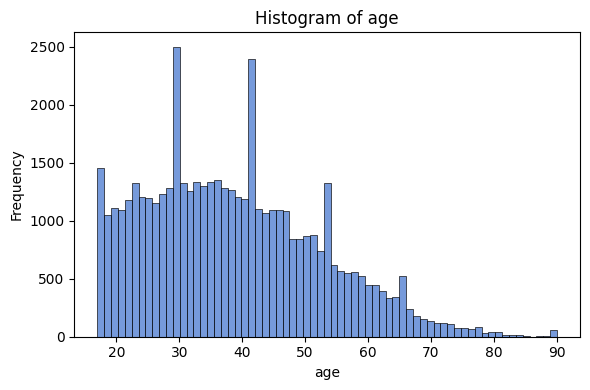

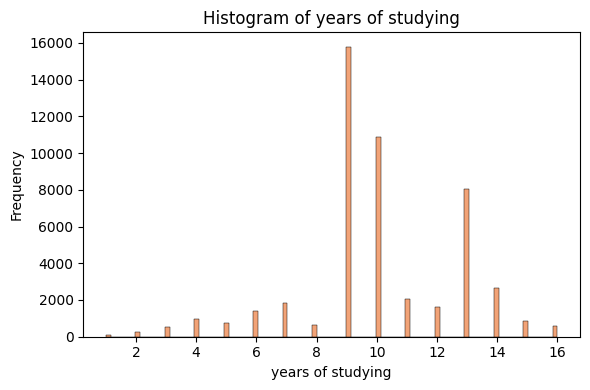

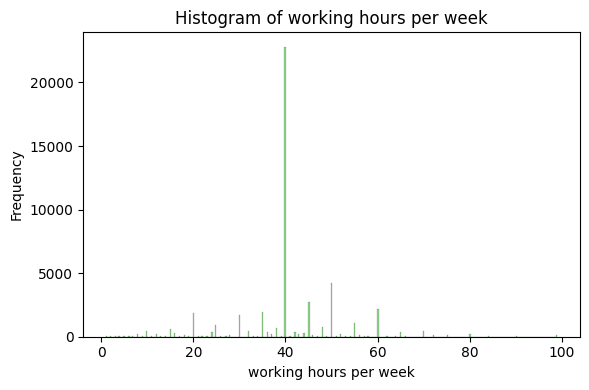

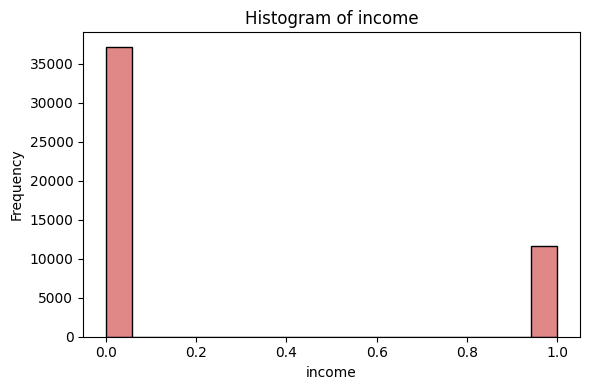

In [83]:
#Plot histograms for each numerical column to understand the distribution
num_cols = df.select_dtypes(include=np.number).columns #select numerical columns
#df[num_cols].hist(figsize=(20, 20))
#plt.show()

for i, col in enumerate(num_cols):
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.histplot(df[col], color=sns.color_palette()[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

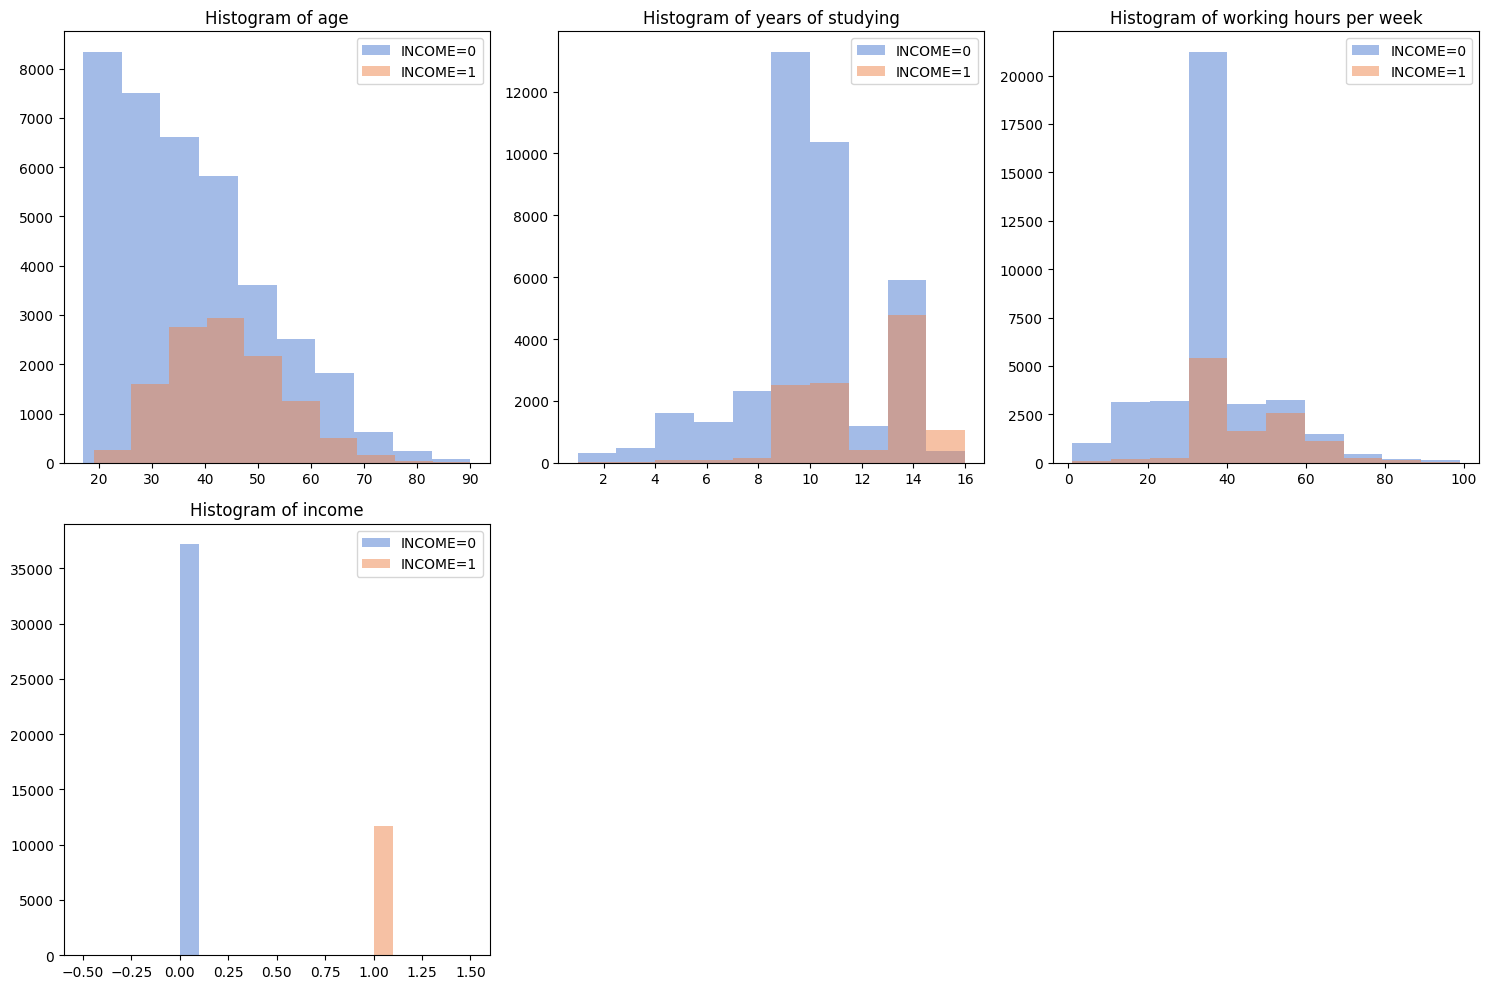

In [84]:
grouped = df.groupby('income')

#Get the list of numerical features
numerical_features = df.select_dtypes(exclude=['O']).columns

#Calculate the number of rows and columns for the subplots
n = len(numerical_features)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

#Create a new figure for the subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

#Flatten the axes array
axs = axs.flatten()

#Iterate over each numerical feature
for i, feature in enumerate(numerical_features):  # Iterate over each group and plot the histogram on the corresponding subplot
    
    # Add a title and a legend to each subplot
    axs[i].set_title(f'Histogram of {feature}')
    for name, group in grouped:
        axs[i].hist(group[feature], alpha=0.5, label=f'INCOME={name}')
    axs[i].legend()
        
#Remove extra subplots
for i in range(n, nrows*ncols):
        fig.delaxes(axs[i])

#Display the plot
plt.tight_layout()
plt.show()


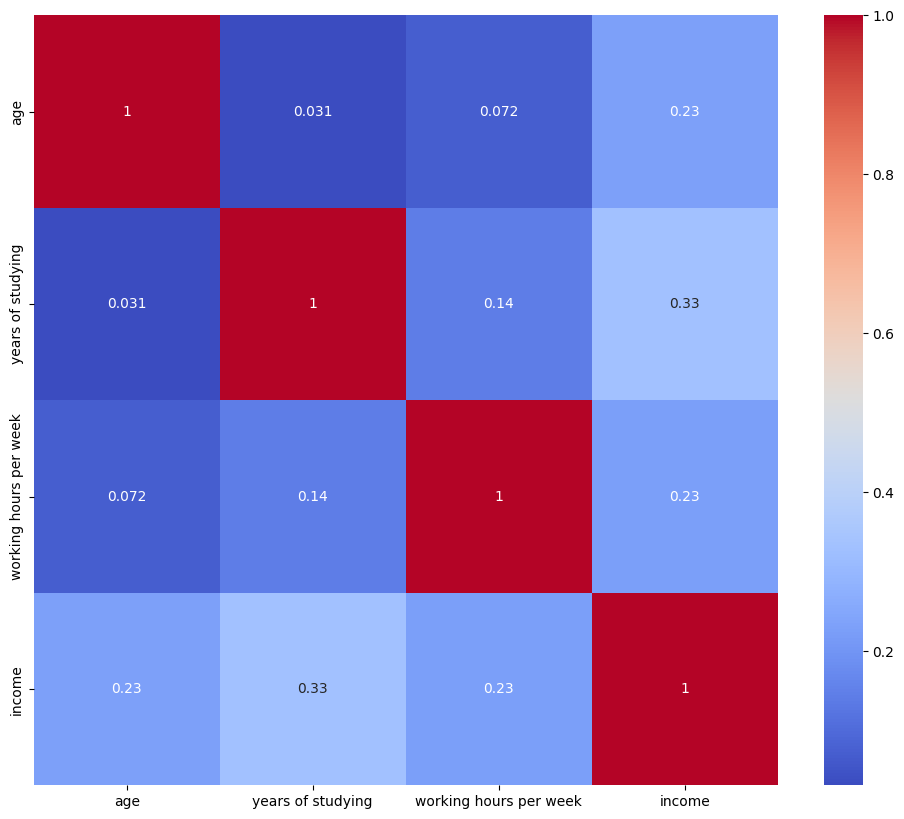

In [85]:
#Plot correlation matrix to understand the relationship between numerical variables
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Plot countplots for each categorical column to understand the distribution

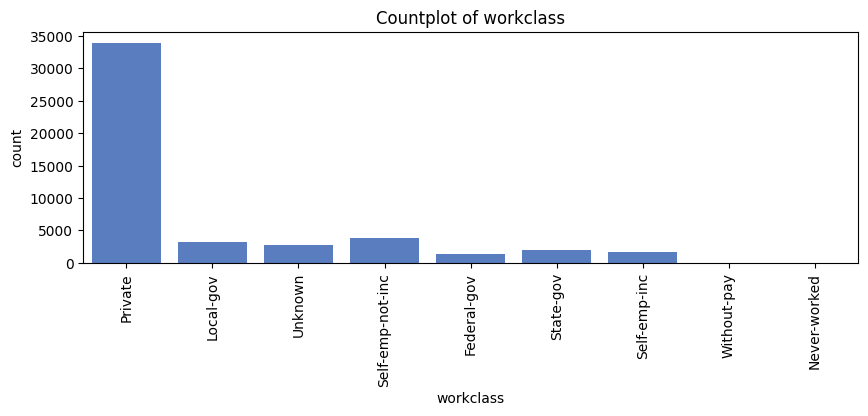

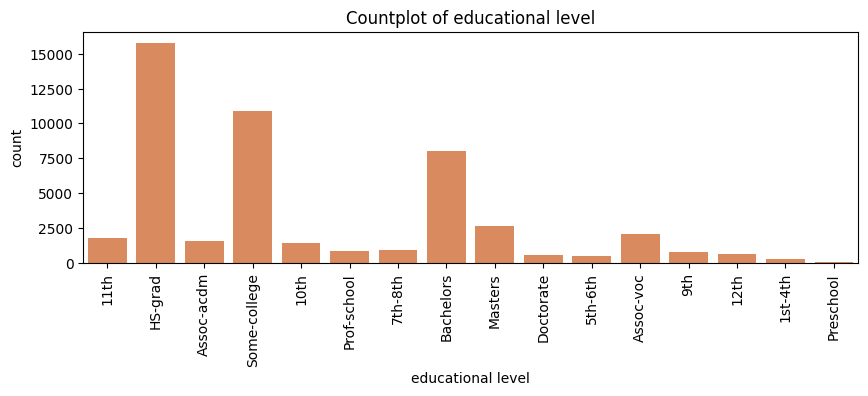

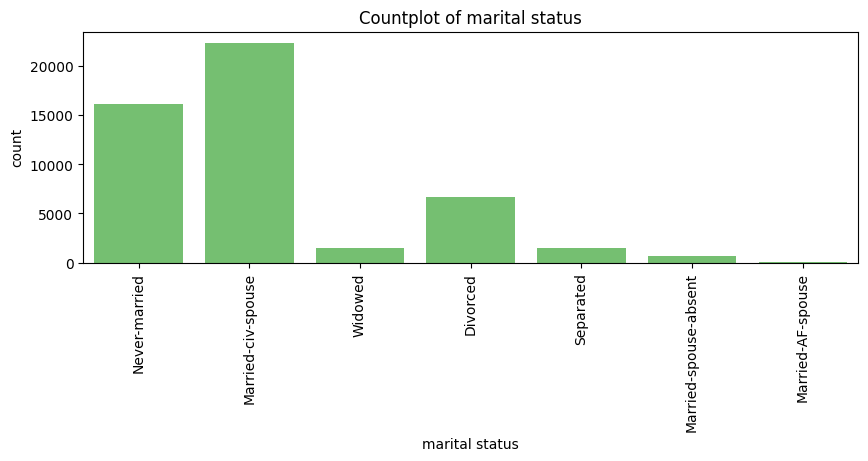

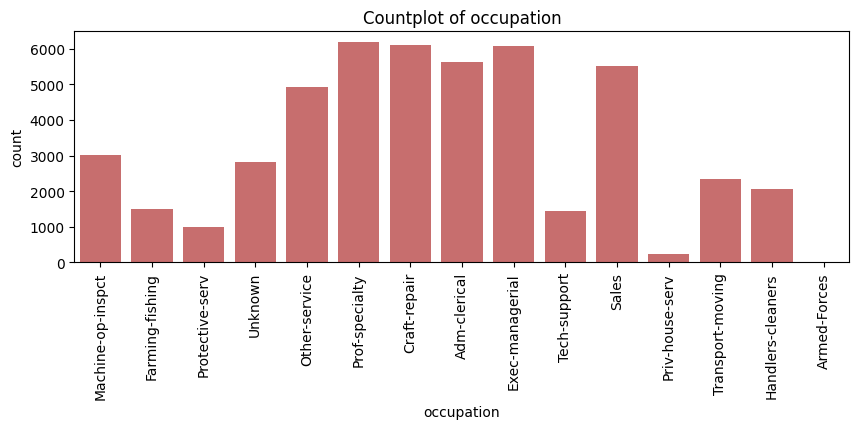

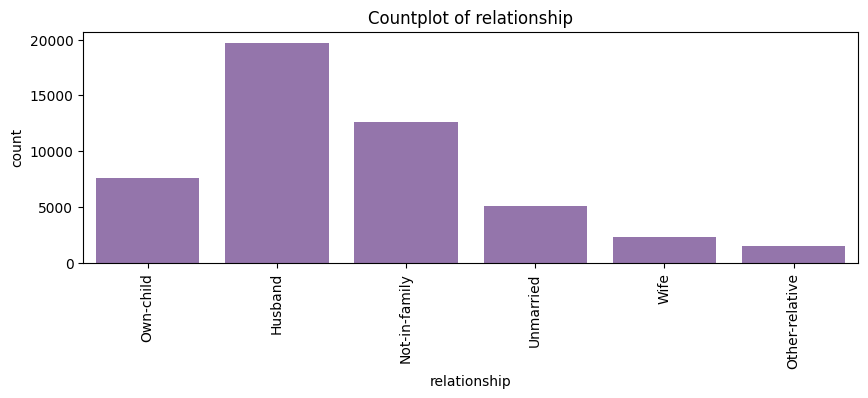

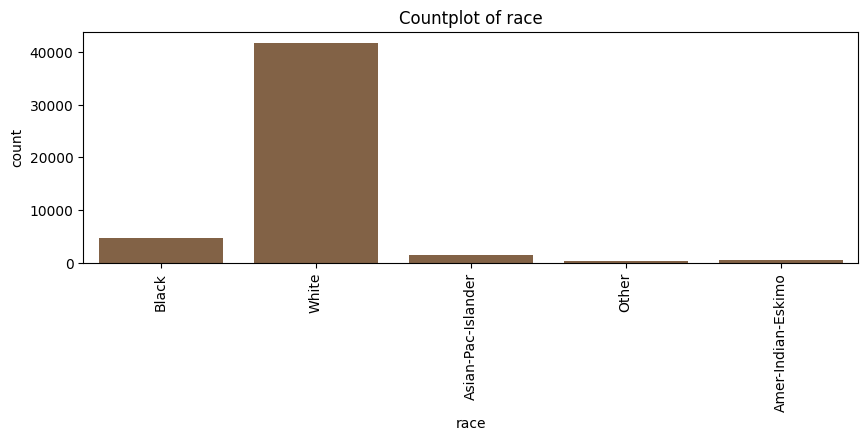

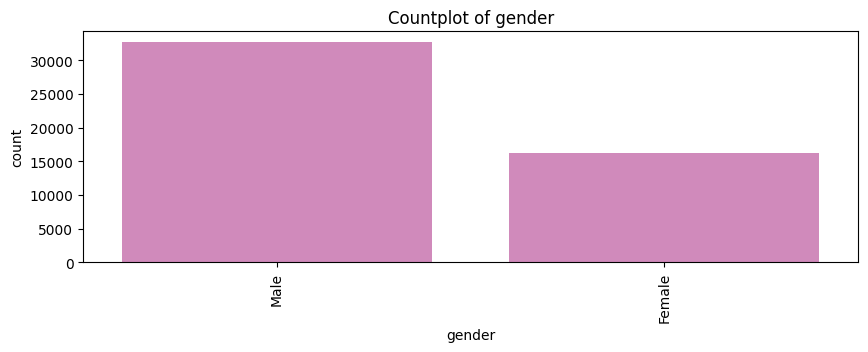

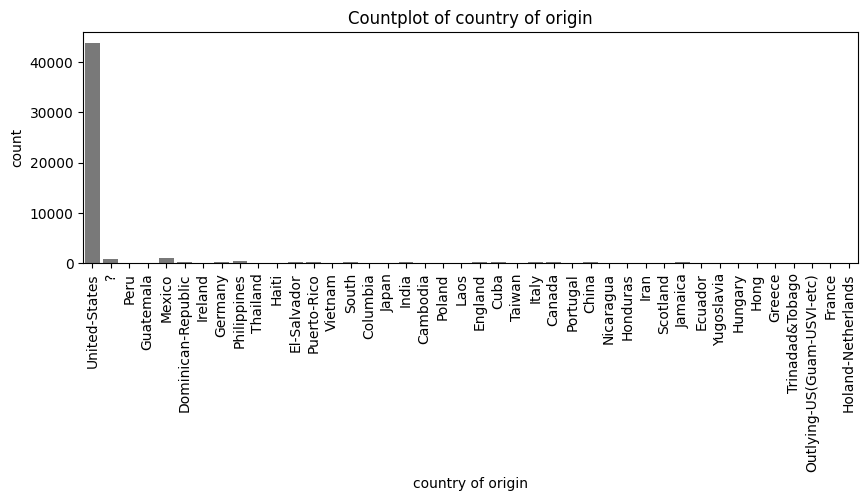

In [86]:

cat_cols = df.select_dtypes(exclude=np.number).columns #select categorical columns
i=0
for column in cat_cols:
    plt.figure(figsize=(10,3))
    sns.countplot(x=column, data=df,color=sns.color_palette()[i] )
    i=i+1
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90) 

    
plt.show()

### Boxplot

In [87]:
sns.boxplot(y = 'island', x = 'body_mass_g',
    order = ['Biscoe', 'Torgersen', 'Dream'],
    hue = 'sex',
    data=df
    );

ValueError: Could not interpret value `body_mass_g` for `x`. An entry with this name does not appear in `data`.